# Lesson Guide
- [Import Data](#ab-Import)
- [Read Data](#ab-read)
- [Explore Data](#ab-explore)
- [Data Cleaning](#ab-cleaning)
- [Null values Market Category](#ab-mc)
- [Null values Engine HP](#ab-hp)
- [Null values Engine cylinders](#ab-ec)
- [Null values Engine fuel type](#ab-engineft)
- [Null values Number of doors](#ab-numdoors)
- [Segmentation](#ab-seg)
- [Examine transmission_type Unknown](#ab-unknown)
- [Visualization of clean data](#ab-visualsclean)
- [Engine HP squared column](#ab-hp^2)
- [Identifying outliers](#ab-outliers)
- [Dummies](#ab-dummies)
- [Train-Test](#ab-train/test)
- [Random forest](#ab-rf)
- [Gradient Boosting](#ab-gb)
- [K-neighbors](#ab-kn)
- [Visualize pred](#ab-visualizepred)
- [Best Model less features](#ab-bestmodel)

<a id='ab-Import'></a>

# Import Data

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection

#import PipeLine, SelectKBest transformer, and RandomForest estimator classes
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_absolute_error
import scipy.stats

<a id='ab-read'></a>

# Read Data

In [2]:
df = pd.read_csv('../Capstone/usedcarnew.csv')

<a id='ab-explore'></a>

# Explore data

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 16)

In [5]:
# Drop duplicates
df = df.drop_duplicates()
print( df.shape )

(11199, 16)


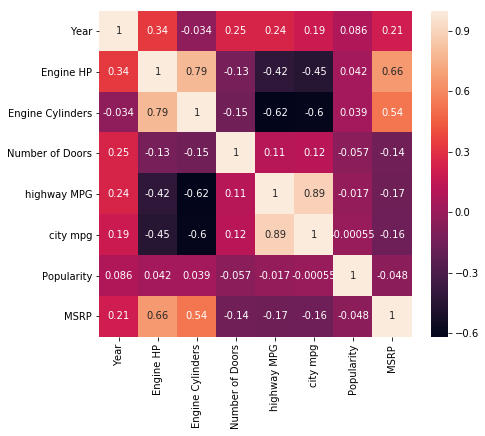

In [6]:
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
#sns.heatmap(correlations)
sns.heatmap(df.corr(), annot = True)

In [7]:
correlations = df.corr()

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

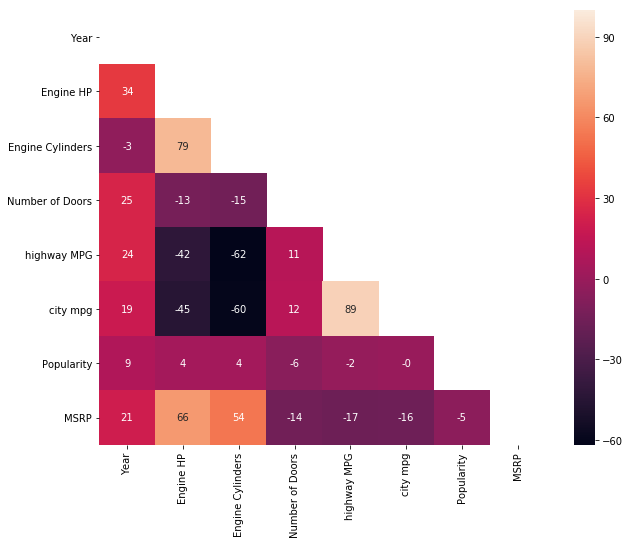

In [9]:
#Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11199 non-null object
Model                11199 non-null object
Year                 11199 non-null int64
Engine Fuel Type     11196 non-null object
Engine HP            11130 non-null float64
Engine Cylinders     11169 non-null float64
Transmission Type    11199 non-null object
Driven_Wheels        11199 non-null object
Number of Doors      11193 non-null float64
Market Category      7823 non-null object
Vehicle Size         11199 non-null object
Vehicle Style        11199 non-null object
highway MPG          11199 non-null int64
city mpg             11199 non-null int64
Popularity           11199 non-null int64
MSRP                 11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [11]:
# Display summary statistics for the numerical features.
#Summarize numerical features
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


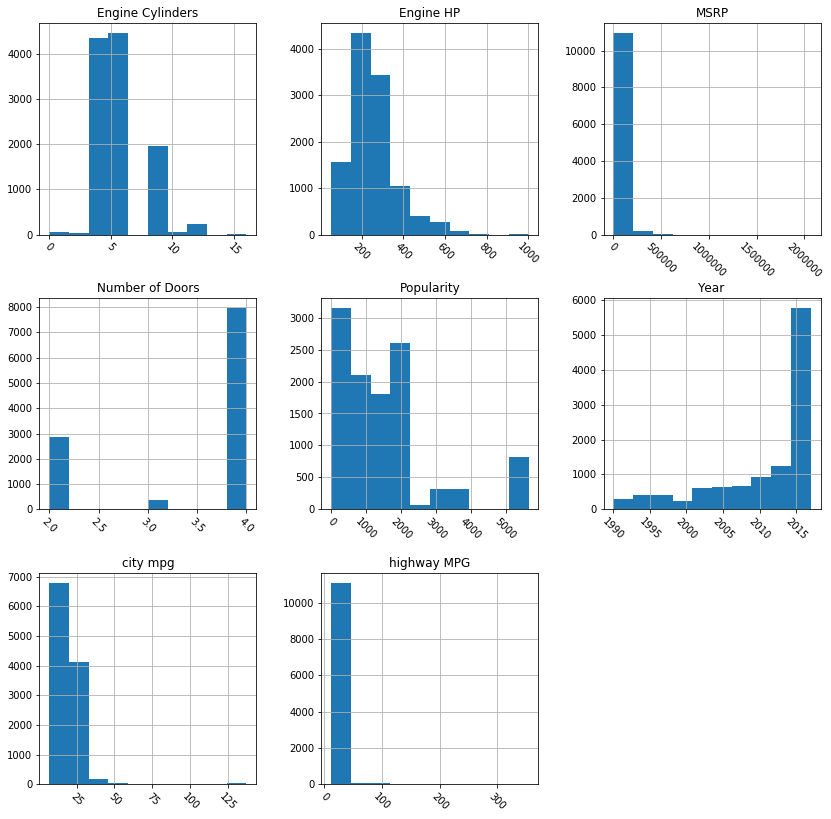

In [12]:
# xrot= argument that rotates x-axis labels counter-clockwise.

# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()

In [13]:
# Summarize categorical features
df.describe(include=['object'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11199,11199,11196,11199,11199,7823,11199,11199
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1083,156,6658,7932,4354,1075,4395,2843


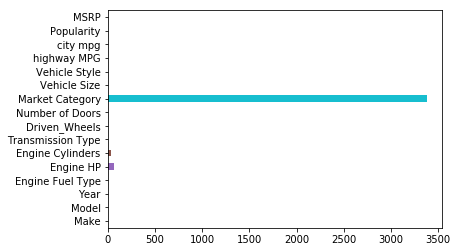

In [14]:
# barchart for missing values in each column
nullvalues = df.isnull().sum()
nullvalues.plot.barh()

In [15]:
df.head()
#df.Year.unique()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<a id='ab-seg'></a>

# SEGMENTATION 

---

Cutting the data to observe the relationship between categorical features and numeric features

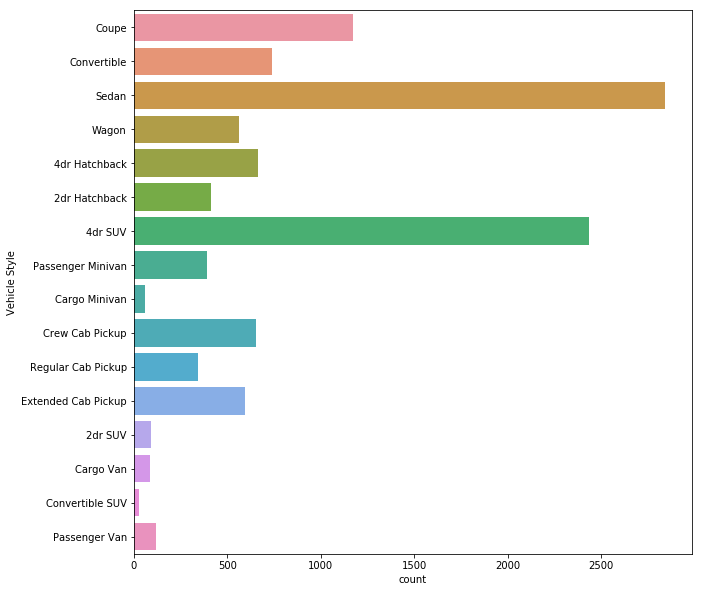

In [16]:
# Bar plot for Vehicle Style
plt.subplots(figsize=(10,10))
sns.countplot(y='Vehicle Style', data=df)

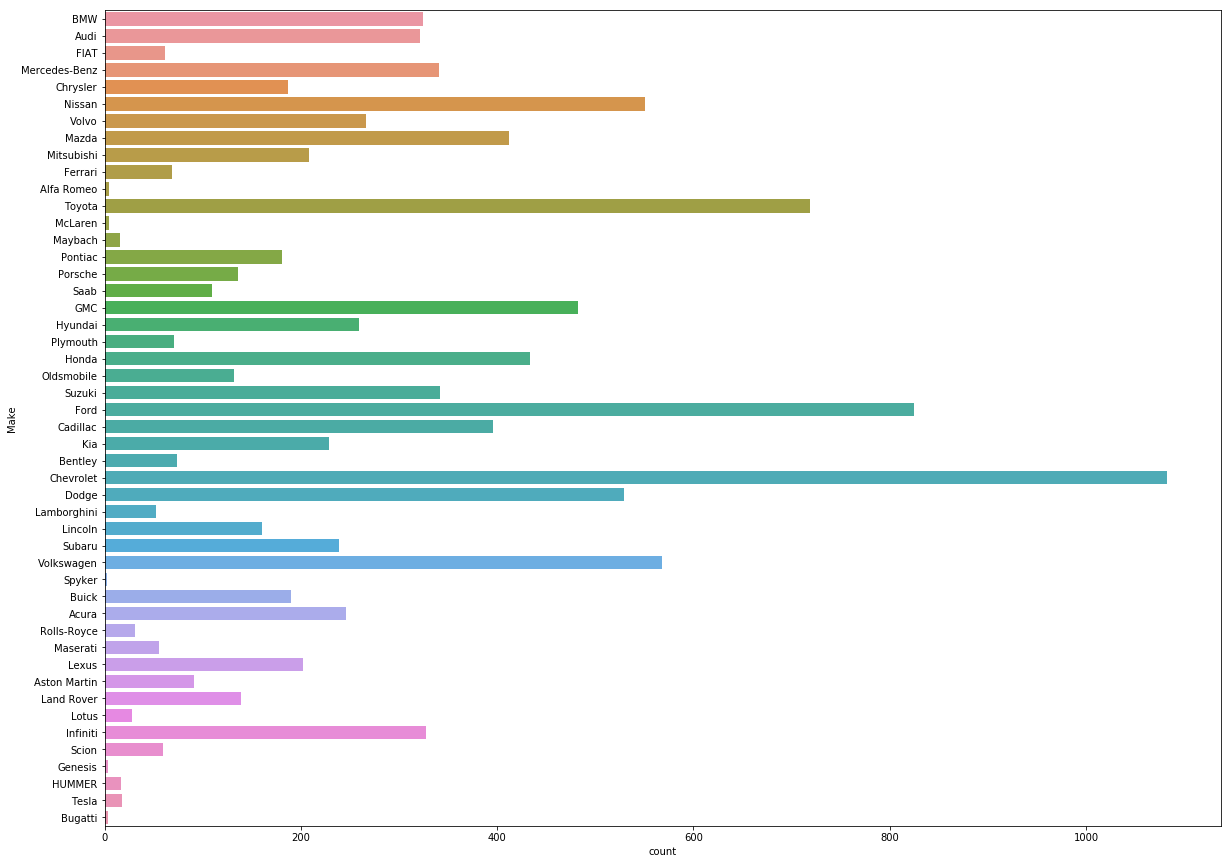

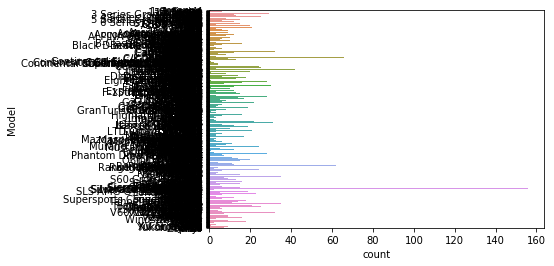

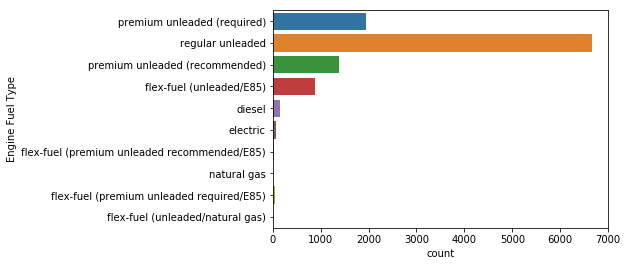

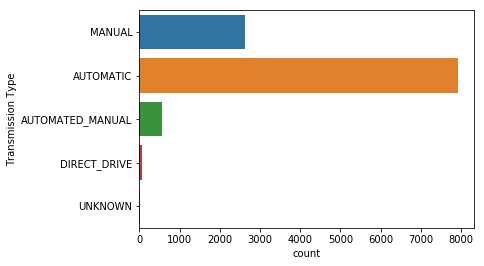

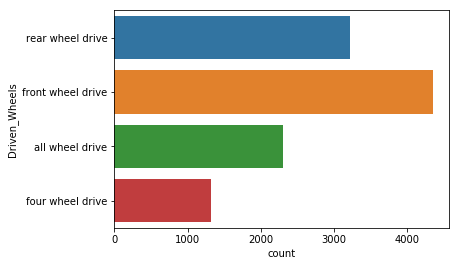

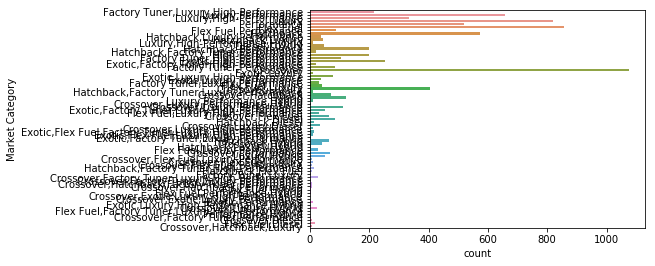

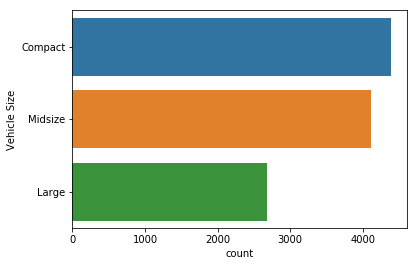

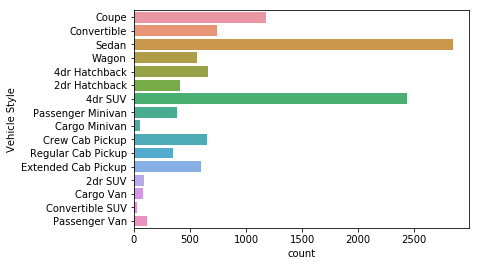

In [17]:
# Plot bar plot for each categorical feature
# Show count of observations
#  for loop to plot bar plots of each of the categorical features.
# Some plots there is too many columns to visualize with this 

plt.subplots(figsize=(20,15))
             
             
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

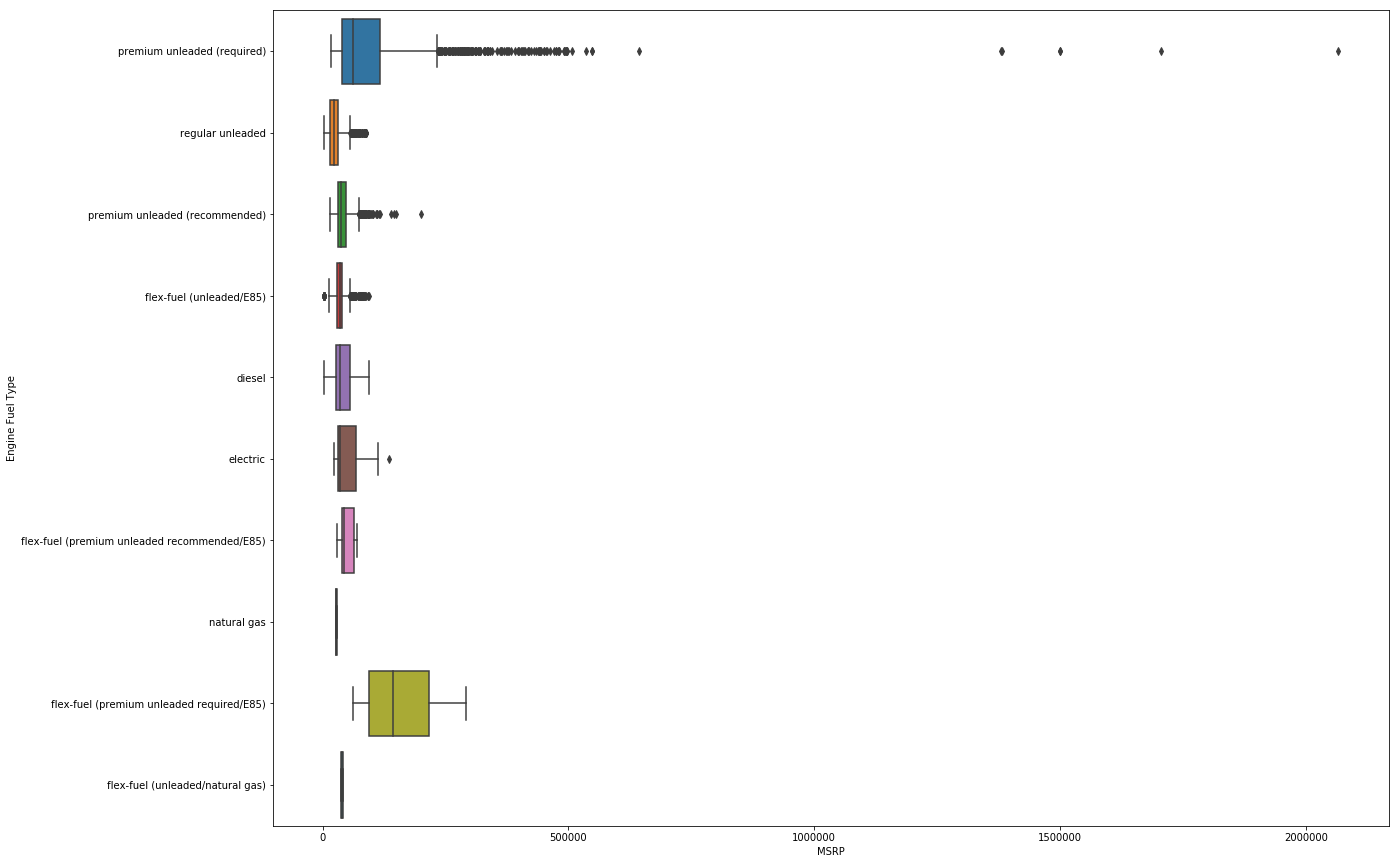

In [18]:
# Segment tx_price by property_type and plot distributions
plt.subplots(figsize=(20,15))
sns.boxplot(y='Engine Fuel Type', x='MSRP', data=df)

In [19]:
# Segment by Engine fuel Type and display the means within each class
# Maybe sue city/ Highway mpg to compare fuel type
df.groupby('Engine Fuel Type').mean()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Engine Fuel Type,,,,,,,,
diesel,2013.360000,184.100671,4.806667,3.720000,36.473333,26.346667,1649.240000,40449.680000
electric,2015.318182,145.318182,0.000000,3.901639,99.590909,112.696970,1773.454545,47943.030303
flex-fuel (premium unleaded recommended/E85),2012.961538,283.346154,5.384615,3.307692,25.346154,16.923077,1332.807692,48641.923077
flex-fuel (premium unleaded required/E85),2013.849057,514.716981,9.396226,3.358491,19.943396,13.283019,376.641509,160692.264151
flex-fuel (unleaded/E85),2013.714769,286.213078,6.626832,3.523112,22.624577,16.160090,2278.855693,36279.217587
flex-fuel (unleaded/natural gas),2016.000000,NaN,6.000000,4.000000,25.000000,17.000000,1385.000000,39194.166667
natural gas,2015.000000,110.000000,4.000000,4.000000,38.000000,27.000000,2202.000000,28065.000000
premium unleaded (recommended),2014.686782,276.525937,5.173851,3.377155,28.407328,20.190374,1227.055316,41812.512213
premium unleaded (required),2012.688650,375.906953,7.005157,3.062916,23.856851,16.649796,1449.656442,102814.088957


<a id='ab-cleaning'></a>

# Data cleaning 

In [20]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Examine how to deal with null values

In [21]:
# shows all null rows information 
df.loc[(df['Market Category'].isnull()) |
              (df['Engine HP'].isnull()) |
              (df['Engine Cylinders'].isnull()) |
              (df['Number of Doors'].isnull()) |
              (df['Engine Fuel Type'].isnull())]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
203,Chrysler,300,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,37570
204,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,31695
205,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,38070
206,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,44895
209,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,34195
210,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,40570
211,Chrysler,300,2016,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,38095


<a id='ab-mc'></a>

## Null values in Market Category 

In [22]:
# Examine the null values of Market Category 
df[df['Market Category'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
203,Chrysler,300,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,37570
204,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,31695
205,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Sedan,31,19,1013,38070
206,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,44895
209,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,34195
210,Chrysler,300,2015,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,40570
211,Chrysler,300,2016,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,38095


In [23]:
list(df['Market Category'].unique())

['Factory Tuner,Luxury,High-Performance',
 'Luxury,Performance',
 'Luxury,High-Performance',
 'Luxury',
 'Performance',
 'Flex Fuel',
 'Flex Fuel,Performance',
 nan,
 'Hatchback',
 'Hatchback,Luxury,Performance',
 'Hatchback,Luxury',
 'Luxury,High-Performance,Hybrid',
 'Diesel,Luxury',
 'Hatchback,Performance',
 'Hatchback,Factory Tuner,Performance',
 'High-Performance',
 'Factory Tuner,High-Performance',
 'Exotic,High-Performance',
 'Exotic,Factory Tuner,High-Performance',
 'Factory Tuner,Performance',
 'Crossover',
 'Exotic,Luxury',
 'Exotic,Luxury,High-Performance',
 'Exotic,Luxury,Performance',
 'Factory Tuner,Luxury,Performance',
 'Flex Fuel,Luxury',
 'Crossover,Luxury',
 'Hatchback,Factory Tuner,Luxury,Performance',
 'Crossover,Hatchback',
 'Hybrid',
 'Luxury,Performance,Hybrid',
 'Crossover,Luxury,Performance,Hybrid',
 'Crossover,Luxury,Performance',
 'Exotic,Factory Tuner,Luxury,High-Performance',
 'Flex Fuel,Luxury,High-Performance',
 'Crossover,Flex Fuel',
 'Diesel',
 'Hatchb

In [24]:
# Decided to drop column becuse there are too many rows missing 
# Plus other features can still describe the market Category 
df.drop('Market Category', axis = 1, inplace=True) 

In [25]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


<a id='ab-hp'></a>

## All Null values in Engine HP

In [26]:
# Examine the null values of Engine HP
df[df['Engine HP'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,26850


### Null values for model Fiat model 500e 
Fill in Engine HP

In [27]:
# Couldn't compare to anything else provided in data
df[df['Model'] == '500e']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800


In [28]:
# Searched Web for Engine HP and all years are the same 

for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Make'][i] == 'FIAT':
            df['Engine HP'][i] = 111

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
df[df['Model'] == '500e']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,111.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,111.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,111.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800


In [30]:
df['Engine HP'].isnull().sum()

66

### model Continental null values 
Fill in Engine HP

In [31]:
df[df['Model'] == 'Continental']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2891,Bentley,Continental,2001,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,15,10,520,299900
2892,Bentley,Continental,2001,premium unleaded (required),400.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,15,10,520,279900
2893,Bentley,Continental,2001,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,15,10,520,309900
2894,Bentley,Continental,2001,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,15,10,520,319900
2895,Bentley,Continental,2003,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,15,10,520,328990
2896,Bentley,Continental,2003,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,15,10,520,318990
2897,Lincoln,Continental,2001,regular unleaded,275.0,8.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,23,15,61,39660
2898,Lincoln,Continental,2002,premium unleaded (required),275.0,8.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,23,15,61,39895
2899,Lincoln,Continental,2002,premium unleaded (required),275.0,8.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,23,15,61,38185
2900,Lincoln,Continental,2002,premium unleaded (required),275.0,8.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,23,15,61,38790


In [32]:
df.loc[2905,'Model'] = 'Continental R'
df.loc[2906,'Model'] = 'Continental SR'
df.loc[2907,'Model'] = 'Continental SR'
df.loc[2908,'Model'] = 'Continental R'

In [33]:
df.loc[2905]

Make                                        Lincoln
Model                                 Continental R
Year                                           2017
Engine Fuel Type     premium unleaded (recommended)
Engine HP                                       NaN
Engine Cylinders                                  6
Transmission Type                         AUTOMATIC
Driven_Wheels                       all wheel drive
Number of Doors                                   4
Vehicle Size                                  Large
Vehicle Style                                 Sedan
highway MPG                                      25
city mpg                                         17
Popularity                                       61
MSRP                                          55915
Name: 2905, dtype: object

In [34]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'Continental R':
            df['Engine HP'][i] = 400
        elif df['Model'][i] == 'Continental SR':
            df['Engine HP'][i] = 335

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
df[df['Model'] == 'Continental R']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2905,Lincoln,Continental R,2017,premium unleaded (recommended),400.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2908,Lincoln,Continental R,2017,premium unleaded (recommended),400.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,64915


In [36]:
# Number is still going down
df['Engine HP'].isnull().sum()

62

### model Escape null values 
Fill in Engine HP

In [37]:
df[df['Model'] == 'Escape']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4192,Ford,Escape,2015,premium unleaded (recommended),178.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,32,23,5657,29735
4193,Ford,Escape,2015,premium unleaded (recommended),178.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,32,23,5657,25650
4194,Ford,Escape,2015,premium unleaded (recommended),178.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,30,22,5657,27400
4195,Ford,Escape,2015,regular unleaded,168.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,31,22,5657,23450
4196,Ford,Escape,2015,premium unleaded (recommended),178.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,30,22,5657,31485
4197,Ford,Escape,2016,premium unleaded (recommended),178.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,29,22,5657,27540
4198,Ford,Escape,2016,premium unleaded (recommended),178.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,32,23,5657,25790
4199,Ford,Escape,2016,premium unleaded (recommended),178.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,32,23,5657,29995
4200,Ford,Escape,2016,regular unleaded,168.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,31,22,5657,23590
4201,Ford,Escape,2016,premium unleaded (recommended),178.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,29,22,5657,31745


In [38]:
df.loc[4203,'Model'] = 'Escape S'
df.loc[4204,'Model'] = 'Escape SE'
df.loc[4205,'Model'] = 'Escape SE'
df.loc[4206,'Model'] = 'Escape S'

In [39]:
df.loc[4205]

Make                             Ford
Model                       Escape SE
Year                             2017
Engine Fuel Type     regular unleaded
Engine HP                         NaN
Engine Cylinders                    4
Transmission Type           AUTOMATIC
Driven_Wheels         all wheel drive
Number of Doors                     4
Vehicle Size                  Compact
Vehicle Style                 4dr SUV
highway MPG                        28
city mpg                           22
Popularity                       5657
MSRP                            26850
Name: 4205, dtype: object

In [40]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'Escape S':
            df['Engine HP'][i] = 168
        elif df['Model'][i] == 'Escape SE':
            df['Engine HP'][i] = 179

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
# Number is still going down
df['Engine HP'].isnull().sum()

58

### model Fit EV null values 
Fill in Engine HP

In [42]:
df[df['Model'] == 'Fit EV']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4705,Honda,Fit EV,2013,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,132,2202,36625


In [43]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'Fit EV':
            df['Engine HP'][i] = 189

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
df[df['Model'] == 'Fit EV']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4705,Honda,Fit EV,2013,electric,189.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,189.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,132,2202,36625


In [45]:
# Number is still going down
df['Engine HP'].isnull().sum()

56

### model Focus null values 
Fill in Engine HP

In [46]:
df[df['Model'] == 'Focus']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4780,Ford,Focus,2015,flex-fuel (unleaded/E85),160.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,36,26,5657,18460
4781,Ford,Focus,2015,flex-fuel (unleaded/E85),160.0,4.0,MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,36,26,5657,18960
4782,Ford,Focus,2015,flex-fuel (unleaded/E85),160.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Compact,Sedan,40,27,5657,23170
4783,Ford,Focus,2015,flex-fuel (unleaded/E85),160.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,36,26,5657,17170
4784,Ford,Focus,2015,flex-fuel (unleaded/E85),160.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,40,27,5657,23670
4785,Ford,Focus,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,99,110,5657,29170
4786,Ford,Focus,2016,flex-fuel (unleaded/E85),160.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,36,26,5657,18515
4787,Ford,Focus,2016,flex-fuel (unleaded/E85),160.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,40,27,5657,23725
4788,Ford,Focus,2016,flex-fuel (unleaded/E85),160.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Compact,Sedan,40,27,5657,23225
4789,Ford,Focus,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,99,110,5657,29170


In [47]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'Focus':
            df['Engine HP'][i] = 143

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
# Number is still going down
df['Engine HP'].isnull().sum()

53

### model Freestar null values 
Fill in Engine HP

In [49]:
df[df['Model'] == 'Freestar']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4914,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,22,16,5657,28030
4915,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,22,16,5657,23930
4916,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Cargo Minivan,22,16,5657,21630
4917,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,22,16,5657,26530
4918,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,21,16,5657,29030
4919,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,21,16,5657,32755
4920,Ford,Freestar,2006,regular unleaded,193.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Cargo Minivan,22,16,5657,19650
4921,Ford,Freestar,2006,regular unleaded,201.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,21,15,5657,29575
4922,Ford,Freestar,2006,regular unleaded,193.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,22,16,5657,23655
4923,Ford,Freestar,2006,regular unleaded,201.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,21,15,5657,26615


In [50]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'Freestar':
            df['Engine HP'][i] = 201

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
# Number is still going down
df['Engine HP'].isnull().sum()

47

### model I-MIEV null values 
Fill in Engine HP

In [52]:
df[df['Model'] == 'i-MiEV']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995


In [53]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'i-MiEV':
            df['Engine HP'][i] = 201

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
# Number is still going down
df['Engine HP'].isnull().sum()

46

### model Impala null values 
Fill in Engine HP

In [55]:
# All years have the same HP for flex fuel v6
df[df['Model'] == 'Impala']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5823,Chevrolet,Impala,2015,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,31,21,1385,34465
5824,Chevrolet,Impala,2015,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,31,21,1385,27060
5825,Chevrolet,Impala,2015,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,40660
5826,Chevrolet,Impala,2015,flex-fuel (unleaded/E85),305.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,29,19,1385,35440
5827,Chevrolet,Impala,2015,flex-fuel (unleaded/E85),305.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,29,19,1385,30285
5828,Chevrolet,Impala,2015,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,31,21,1385,29310
5830,Chevrolet,Impala,2015,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,37535
5831,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,40810
5832,Chevrolet,Impala,2016,flex-fuel (unleaded/E85),305.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,29,19,1385,35540
5833,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,37570


In [56]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
        if df['Model'][i] == 'Impala':
            df['Engine HP'][i] = 305

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
# Number is still going down
df['Engine HP'].isnull().sum()

40

### model Leaf null values 
Fill in Engine HP

In [58]:
df[df['Model'] == 'Leaf']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6385,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,35020
6386,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,32000
6387,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,28980
6388,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,32100
6389,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,35120
6390,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,29010
6391,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,32000
6392,Nissan,Leaf,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,126,2009,29010
6393,Nissan,Leaf,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,124,2009,34200
6394,Nissan,Leaf,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,101,124,2009,36790


In [59]:
# All leaf models are 110 HP
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
        if df['Model'][i] == 'Leaf':
            df['Engine HP'][i] = 110

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
# Number is still going down
df['Engine HP'].isnull().sum()

30

### Null value for M-Class

In [61]:
df[df['Model'] == 'M-Class']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6566,Mercedes-Benz,M-Class,2013,diesel,240.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,28,20,617,51270
6567,Mercedes-Benz,M-Class,2013,premium unleaded (required),518.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,17,13,617,96100
6568,Mercedes-Benz,M-Class,2013,premium unleaded (required),402.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,20,14,617,58800
6569,Mercedes-Benz,M-Class,2013,premium unleaded (required),302.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,23,18,617,49770
6570,Mercedes-Benz,M-Class,2013,premium unleaded (required),302.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,23,18,617,47270
6571,Mercedes-Benz,M-Class,2014,premium unleaded (required),518.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,17,13,617,97250
6572,Mercedes-Benz,M-Class,2014,diesel,240.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,28,20,617,51790
6573,Mercedes-Benz,M-Class,2014,premium unleaded (required),302.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,22,17,617,50290
6574,Mercedes-Benz,M-Class,2014,premium unleaded (required),402.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,19,14,617,59450
6575,Mercedes-Benz,M-Class,2014,premium unleaded (required),302.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,24,18,617,47790


In [62]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
        if df['Model'][i] == 'M-Class':
            df['Engine HP'][i] = 240

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
# Number is still going down
df['Engine HP'].isnull().sum()

29

### Model MKZ
Fill in null Engine HP

In [64]:
# Only difference are the fuel type and Drivn_wheels
# 2.0L version can be front or all wheel drive 
# Would still use 245 HP for year 2017
df[df['Model'] == 'MKZ']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6896,Lincoln,MKZ,2015,regular unleaded,231.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,33,22,61,45555
6897,Lincoln,MKZ,2015,regular unleaded,231.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,33,22,61,35190
6898,Lincoln,MKZ,2015,regular unleaded,188.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,39,41,61,35190
6899,Lincoln,MKZ,2015,regular unleaded,231.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31,22,61,37080
6900,Lincoln,MKZ,2015,regular unleaded,188.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,39,41,61,45555
6901,Lincoln,MKZ,2015,regular unleaded,231.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31,22,61,47445
6902,Lincoln,MKZ,2016,regular unleaded,231.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31,22,61,37080
6903,Lincoln,MKZ,2016,regular unleaded,188.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,39,41,61,45605
6904,Lincoln,MKZ,2016,regular unleaded,231.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,33,22,61,45605
6905,Lincoln,MKZ,2016,regular unleaded,231.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31,22,61,47495


In [65]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Model'][i] == 'MKZ':
            df['Engine HP'][i] = 245

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
# Number is still going down
df['Engine HP'].isnull().sum()

25

### Model RAV4 EV
Fill in null Engine HP

In [67]:
# All model years are the same HP
df[df['Model'] == 'RAV4 EV']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800
8374,Toyota,RAV4 EV,2013,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800
8375,Toyota,RAV4 EV,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800


In [68]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
        if df['Model'][i] == 'RAV4 EV':
            df['Engine HP'][i] = 154

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
# Number is still going down
df['Engine HP'].isnull().sum()

23

### Model Soul S
Fill in null Engine HP

In [70]:
df[df['Model'] == 'Soul EV']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950


In [71]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
        if df['Model'][i] == 'Soul EV':
            df['Engine HP'][i] = 109

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
# Number is still going down
df['Engine HP'].isnull().sum()

18

### Model S
Fill in null Engine HP

In [73]:
df[df['Model'] == 'Model S']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6921,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Large,Sedan,90,88,1391,79900
6922,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Large,Sedan,97,94,1391,69900
6923,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,94,86,1391,104500
6924,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Large,Sedan,90,88,1391,93400
6925,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Large,Sedan,97,94,1391,69900
6926,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,102,101,1391,75000
6927,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,106,95,1391,85000
6928,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,98,89,1391,105000
6929,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Large,Sedan,90,88,1391,80000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500


In [74]:
# Change model name by the driven wheels

for i, j in df['Model'].iteritems():
    if np.isnan(df['Engine HP'][i]):
#         print (i,j)
        if df['Driven_Wheels'][i] == 'all wheel drive':
            df['Model'][i] = 'Model D'
        elif df['Driven_Wheels'][i] == 'rear wheel drive':
            df['Model'][i] = 'Model S'

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
df[df['Model'] == 'Model D']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6923,Tesla,Model D,2014,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,94,86,1391,104500
6926,Tesla,Model D,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,102,101,1391,75000
6927,Tesla,Model D,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,106,95,1391,85000
6928,Tesla,Model D,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,98,89,1391,105000
6930,Tesla,Model D,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model D,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model D,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6934,Tesla,Model D,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000
6935,Tesla,Model D,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,102,101,1391,75000
6936,Tesla,Model D,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,Large,Sedan,107,101,1391,89500


In [76]:
for i, j in df['Engine HP'].iteritems():
    if np.isnan(df['Engine HP'][i]):
        if df['Model'][i] == 'Model S':
            df['Engine HP'][i] = 362
        elif df['Model'][i] == 'Model D':
            df['Engine HP'][i] = 259

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
# Down to Zero
df['Engine HP'].isnull().sum()

0

<a id='ab-ec'></a>

## NUll values in Engine Cylinders 

In [78]:
# Examine the null values of Engine Cylinder 
df[df['Engine Cylinders'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,201.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800


In [79]:
# from what I can see this model is a rotary engine which means it have no cylinders 
df[df['Model'] == 'RX-7']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,Compact,Coupe,23,15,586,7523
8696,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,Compact,Coupe,23,15,586,8147
8697,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,Compact,Coupe,23,15,586,8839


In [80]:
# from what I can see this model is a rotary engine which means it have no cylinders 
df[df['Model'] == 'RX-8']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,31930
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,26435
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,27860
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,31000
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,26435
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,31700
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,28560
8705,Mazda,RX-8,2010,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,32140
8706,Mazda,RX-8,2010,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,26645
8707,Mazda,RX-8,2010,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,32810


In [81]:
# Also no electric cars have cylinders
# was able to repalce all nan values with 0
for i, j in df['Engine Cylinders'].iteritems():
    if np.isnan(df['Engine Cylinders'][i]):
            df['Engine Cylinders'][i] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
df[df['Engine Cylinders'] <=0]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,111.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,111.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,111.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,617,39900
1983,Chevrolet,Bolt EV,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445


In [83]:
df.groupby(['Make','Model', 'Engine Cylinders']).count()

Year  Engine Fuel Type  \
Make         Model             Engine Cylinders                           
Acura        CL                6.0                  9                 9   
             ILX               4.0                 16                16   
             ILX Hybrid        4.0                  2                 2   
             Integra           4.0                 24                24   
             Legend            6.0                 16                16   
             MDX               6.0                 34                34   
             NSX               6.0                  5                 5   
             RDX               6.0                 24                24   
             RL                6.0                  9                 9   
             RLX               6.0                 12                12   
             RSX               4.0                 15                15   
             SLX               6.0                  4                 4   
             TL                6.0                 23                23   
             TLX               4.0                  6                 6   
                               6.0                 15                15   
             TSX               4.0                 12                12   
                               6.0                  4                 4   
             TSX Sport Wagon   4.0                  6                 6   
             Vigor             5.0                  3                 3   
             ZDX               6.0                  7                 7   
Alfa Romeo   4C                4.0                  5                 5   
Aston Martin DB7               12.0                 4                 4   
             DB9               12.0                 8                 8   
             DB9 GT            12.0                 3                 3   
             DBS               12.0                16                16   
             Rapide            12.0                 4                 4   
             Rapide S          12.0                 3                 3   
             V12 Vanquish      12.0                 4                 4   
             V12 Vantage       12.0                 4                 4   
             V12 Vantage S     12.0                 3                 3   
...                                               ...               ...   
Volvo        C70               5.0                  3                 3   
             Coupe             4.0                  1                 1   
             S40               5.0                  8                 8   
             S60               4.0                 16                16   
                               5.0                  7                 7   
                               6.0                  5                 5   
             S60 Cross Country 4.0                  1                 1   
             S70               5.0                 13                13   
             S80               4.0                  4                 4   
                               6.0                  4                 4   
             S90               4.0                  4                 4   
                               6.0                  1                 1   
             V40               4.0                  4                 4   
             V50               5.0                  6                 6   
             V60               4.0                 11                11   
                               5.0                  5                 5   
                               6.0                  5                 5   
             V60 Cross Country 4.0                  2                 2   
                               5.0                  4                 4   
             V70               6.0                  4                 4   
             V90               6.0                  1                 1   

In [84]:
grouped = df.groupby('Year')
print(grouped.get_group(2014))

              Make                  Model  Year             Engine Fuel Type  \
120          Mazda                      2  2014             regular unleaded   
121          Mazda                      2  2014             regular unleaded   
122          Mazda                      2  2014             regular unleaded   
123          Mazda                      2  2014             regular unleaded   
468        Ferrari             458 Italia  2014  premium unleaded (required)   
469        Ferrari             458 Italia  2014  premium unleaded (required)   
470        Ferrari             458 Italia  2014  premium unleaded (required)   
479         Toyota                4Runner  2014             regular unleaded   
480         Toyota                4Runner  2014             regular unleaded   
481         Toyota                4Runner  2014             regular unleaded   
482         Toyota                4Runner  2014             regular unleaded   
483         Toyota                4Runne

<a id='ab-engineft'></a>

### Null values in Engine Fuel Type 

In [85]:
# Examine the null values of Engine Fuel Type
df[df['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


In [86]:
# look at other models with the same model
# Ended up searching the web to get answer. Since the years didn't match
df[df['Model'] == 'Verona']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18299


In [87]:
# Couldn't get the for loop too work. 
# Took the long way to solve instead of using so much time trying to figure it out
# 
df.loc[11321,'Engine Fuel Type'] = 'regular unleaded'
df.loc[11322,'Engine Fuel Type'] = 'regular unleaded'
df.loc[11323,'Engine Fuel Type'] = 'regular unleaded'

In [88]:
df['Engine Fuel Type'].isnull().sum()

0

<a id='ab-numdoors'></a>

## Null values in Number of Doors

In [89]:
# Examine the null values of number of Doors
df[df['Number of Doors'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model D,2016,electric,259.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model D,2016,electric,259.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model D,2016,electric,259.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,362.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model D,2016,electric,259.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000


In [90]:
# np.isnan(df['Number of Doors'][6930])

In [91]:
# i will iterate through index 
# j will show value of column 'Number of Doors'
# if statement will replace number of doors 

for i, j in df['Number of Doors'].iteritems():
    if np.isnan(df['Number of Doors'][i]):
#         print (i,j)
        if df['Vehicle Style'][i] == 'Coupe':
            df['Number of Doors'][i] = 2
        elif df['Vehicle Style'][i] == 'Sedan':
            df['Number of Doors'][i] = 4
            
            

        
#     print (i, j)
# if df['Number of Doors'].isnull():
#     df['Vehicle Style'] == 'Coupe'
    
#     else:
#     df['Vehicle Style'] == 'Sedan'
    

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
df['Number of Doors'].isnull().sum()

0

In [93]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [94]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


<a id='ab-unknown'></a>

# Examine transmission type Unknown

In [95]:
df[df['Transmission Type'] == 'UNKNOWN']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1289,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,2.0,Midsize,Coupe,29,19,26,2000
1290,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,4.0,Midsize,Sedan,29,19,26,2000
4691,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,210,6175
4692,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,210,8548
4693,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,Convertible,23,15,210,9567
6158,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,19,14,549,2182
6160,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,19,14,549,2317
6165,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,20,15,549,2407
6174,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,18,14,549,2578
6366,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,UNKNOWN,front wheel drive,2.0,Compact,Coupe,26,21,1013,2000


In [96]:
# Look through model firebird to see if I can use data to fill transmission type
df[df['Model'] == 'Firebird']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4690,Pontiac,Firebird,2000,regular unleaded,200.0,6.0,MANUAL,rear wheel drive,2.0,Midsize,2dr Hatchback,28,17,210,4677
4691,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,210,6175
4692,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,210,8548
4693,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,Convertible,23,15,210,9567
4694,Pontiac,Firebird,2000,regular unleaded,200.0,6.0,MANUAL,rear wheel drive,2.0,Midsize,Convertible,28,17,210,5844
4695,Pontiac,Firebird,2001,premium unleaded (required),310.0,8.0,AUTOMATIC,rear wheel drive,2.0,Midsize,2dr Hatchback,23,16,210,24035
4696,Pontiac,Firebird,2001,regular unleaded,200.0,6.0,MANUAL,rear wheel drive,2.0,Midsize,Convertible,28,17,210,25475
4697,Pontiac,Firebird,2001,premium unleaded (required),310.0,8.0,AUTOMATIC,rear wheel drive,2.0,Midsize,Convertible,23,16,210,31215
4698,Pontiac,Firebird,2001,regular unleaded,200.0,6.0,MANUAL,rear wheel drive,2.0,Midsize,2dr Hatchback,28,17,210,18855
4699,Pontiac,Firebird,2001,premium unleaded (required),310.0,8.0,AUTOMATIC,rear wheel drive,2.0,Midsize,2dr Hatchback,23,16,210,27145


In [97]:
df[df['Model'] == 'Achieva']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1287,Oldsmobile,Achieva,1996,regular unleaded,150.0,4.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,30,20,26,2000
1288,Oldsmobile,Achieva,1996,regular unleaded,150.0,4.0,MANUAL,front wheel drive,2.0,Midsize,Coupe,30,20,26,2000
1289,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,2.0,Midsize,Coupe,29,19,26,2000
1290,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,4.0,Midsize,Sedan,29,19,26,2000
1291,Oldsmobile,Achieva,1998,regular unleaded,150.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,27,18,26,2000


In [98]:
df[df['Model'] == 'Jimmy']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6155,GMC,Jimmy,1999,regular unleaded,190.0,6.0,MANUAL,four wheel drive,2.0,Compact,2dr SUV,16,13,549,2347
6156,GMC,Jimmy,1999,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,19,14,549,2554
6157,GMC,Jimmy,1999,regular unleaded,190.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,19,14,549,2590
6158,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,19,14,549,2182
6159,GMC,Jimmy,1999,regular unleaded,190.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,19,14,549,2691
6160,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,19,14,549,2317
6161,GMC,Jimmy,1999,regular unleaded,190.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,19,14,549,2368
6162,GMC,Jimmy,1999,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,19,14,549,2377
6163,GMC,Jimmy,1999,regular unleaded,190.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,19,14,549,2251
6164,GMC,Jimmy,1999,regular unleaded,190.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr SUV,21,15,549,2038


In [99]:
df[df['Model'] == 'Le Baron']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6364,Chrysler,Le Baron,1993,regular unleaded,141.0,6.0,MANUAL,front wheel drive,2.0,Compact,Coupe,26,17,1013,2000
6365,Chrysler,Le Baron,1993,regular unleaded,141.0,6.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,26,18,1013,2000
6366,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,UNKNOWN,front wheel drive,2.0,Compact,Coupe,26,21,1013,2000
6367,Chrysler,Le Baron,1993,regular unleaded,141.0,6.0,MANUAL,front wheel drive,2.0,Compact,Convertible,24,17,1013,2000
6368,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,UNKNOWN,front wheel drive,2.0,Compact,Convertible,24,18,1013,2000
6369,Chrysler,Le Baron,1993,regular unleaded,141.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,Coupe,26,18,1013,2000
6370,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,26,21,1013,2000
6371,Chrysler,Le Baron,1993,regular unleaded,141.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,Convertible,26,18,1013,2000
6372,Chrysler,Le Baron,1994,regular unleaded,141.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,Convertible,26,18,1013,2000
6373,Chrysler,Le Baron,1994,regular unleaded,142.0,6.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,24,18,1013,2000


In [100]:
df[df['Model'] == 'RAM 150']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8042,Dodge,RAM 150,1991,regular unleaded,125.0,6.0,UNKNOWN,rear wheel drive,2.0,Large,Regular Cab Pickup,17,12,1851,2000
8044,Dodge,RAM 150,1991,regular unleaded,170.0,8.0,MANUAL,four wheel drive,2.0,Large,Extended Cab Pickup,13,10,1851,2000
8045,Dodge,RAM 150,1991,regular unleaded,170.0,8.0,MANUAL,rear wheel drive,2.0,Large,Extended Cab Pickup,14,11,1851,2000
8054,Dodge,RAM 150,1992,regular unleaded,180.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,16,11,1851,2000
8055,Dodge,RAM 150,1992,regular unleaded,230.0,8.0,MANUAL,four wheel drive,2.0,Large,Extended Cab Pickup,15,12,1851,2000
8056,Dodge,RAM 150,1992,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,17,14,1851,2000
8058,Dodge,RAM 150,1992,regular unleaded,230.0,8.0,MANUAL,rear wheel drive,2.0,Large,Extended Cab Pickup,16,11,1851,2000
8068,Dodge,RAM 150,1993,regular unleaded,180.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,16,11,1851,2000
8071,Dodge,RAM 150,1993,regular unleaded,230.0,8.0,MANUAL,rear wheel drive,2.0,Large,Extended Cab Pickup,16,12,1851,2000
8072,Dodge,RAM 150,1993,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,17,14,1851,2000


In [101]:
df.loc[1289,'Transmission Type'] = 'MANUAL'
df.loc[1290,'Transmission Type'] = 'MANUAL'
df.loc[4691,'Transmission Type'] = 'MANUAL'
df.loc[4692,'Transmission Type'] = 'MANUAL'
df.loc[4693,'Transmission Type'] = 'MANUAL'
df.loc[6158,'Transmission Type'] = 'AUTOMATIC'
df.loc[6160,'Transmission Type'] = 'AUTOMATIC'
df.loc[6165,'Transmission Type'] = 'MANUAL'
df.loc[6174,'Transmission Type'] = 'AUTOMATIC'
df.loc[6366,'Transmission Type'] = 'AUTOMATIC'
df.loc[6368,'Transmission Type'] = 'AUTOMATIC'
df.loc[8042,'Transmission Type'] = 'MANUAL'

In [102]:
df[df['Transmission Type'] == 'UNKNOWN']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


<a id='ab-visualsclean'></a>

# Visuals of clean data 

In [103]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200


In [104]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.334092,-0.033038,0.247648,0.244972,0.188417,0.085874,0.209635
Engine HP,0.334092,1.000000,0.771169,-0.129639,-0.374234,-0.373267,0.039185,0.658245
Engine Cylinders,-0.033038,0.771169,1.000000,-0.152048,-0.610338,-0.585333,0.043010,0.533431
Number of Doors,0.247648,-0.129639,-0.152048,1.000000,0.115311,0.121194,-0.057379,-0.145179
highway MPG,0.244972,-0.374234,-0.610338,0.115311,1.000000,0.886299,-0.017159,-0.166631
city mpg,0.188417,-0.373267,-0.585333,0.121194,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.039185,0.043010,-0.057379,-0.017159,-0.000549,1.000000,-0.048371
MSRP,0.209635,0.658245,0.533431,-0.145179,-0.166631,-0.162343,-0.048371,1.000000


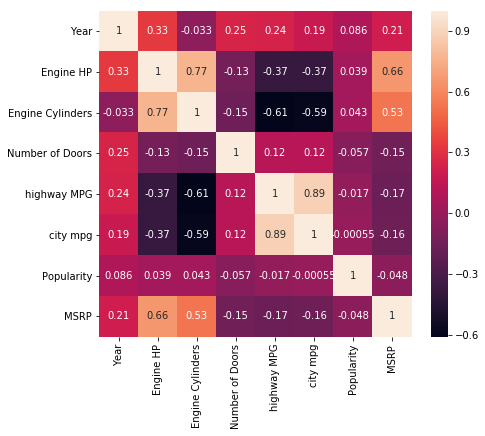

In [105]:
# Can see that Engine HP, Engine cylinders, and popularity have strongest correlation with price 
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
#sns.heatmap(correlations)
sns.heatmap(df.corr(), annot = True)

Text(0,0.5,'Engine Cylinders')

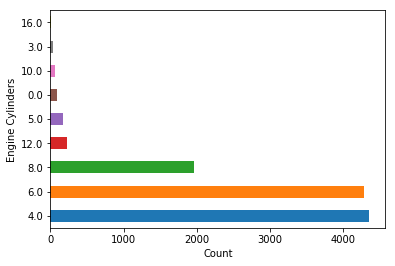

In [106]:
EC = df['Engine Cylinders'].value_counts()
EC.plot.barh()
plt.xlabel('Count')
plt.ylabel('Engine Cylinders')

Text(0,0.5,'Count')

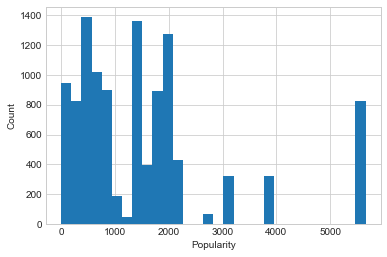

In [107]:
sns.set_style('whitegrid')
df['Popularity'].hist(bins=30)
plt.xlabel('Popularity')
plt.ylabel('Count')

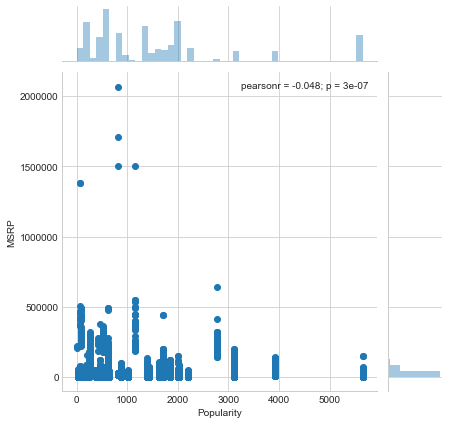

In [108]:
# Create a jointplot showing MSRP versus Popularity.
sns.jointplot(x='Popularity',y='MSRP',data=df)

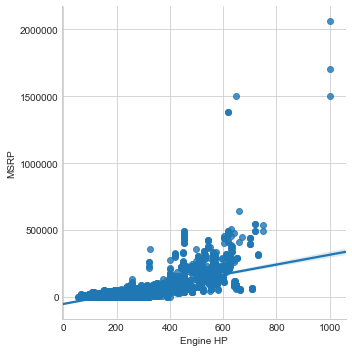

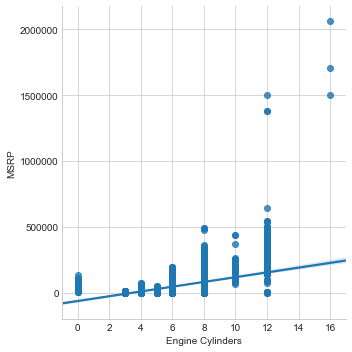

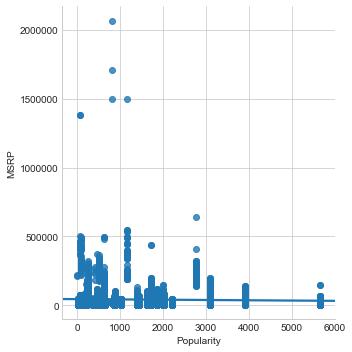

In [109]:
# plot showing the relationship between the independent
# and dependent variables.

sns.lmplot(x='Engine HP', y='MSRP', data=df)
plt.show()
sns.lmplot(x='Engine Cylinders', y='MSRP', data=df)
plt.show()
sns.lmplot(x='Popularity', y='MSRP', data=df)
plt.show()

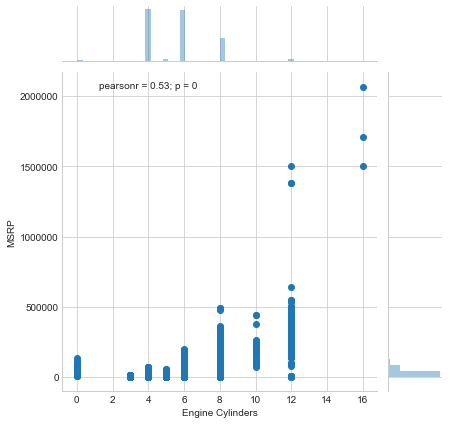

In [110]:
# Create a jointplot showing MSRP versus engine cylinders.
sns.jointplot(x='Engine Cylinders',y='MSRP',data=df)

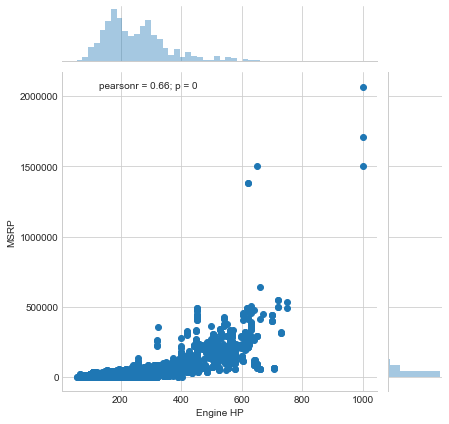

In [111]:
# Create a jointplot showing MSRP versus Engine HP.
sns.jointplot(x='Engine HP',y='MSRP',data=df)

Text(0.5,0,'Engine HP')

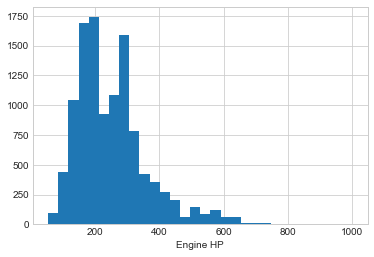

In [112]:
sns.set_style('whitegrid')
df['Engine HP'].hist(bins=30)
plt.xlabel('Engine HP')

Text(0.5,0,'Engine HP')

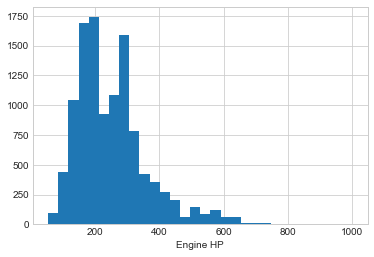

In [113]:
sns.set_style('whitegrid')
df['Engine HP'].hist(bins=30)
plt.xlabel('Engine HP')

<a id='ab-hp^2'></a>

# Create Engine HP squared column

Seeing if Engine HP squared would perform better fit in model

In [114]:
df['Engine HP^2'] = (df['Engine HP'] * df['Engine HP']).astype(int)

In [115]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Engine HP^2
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,112225
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,90000
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,90000
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,52900
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,52900


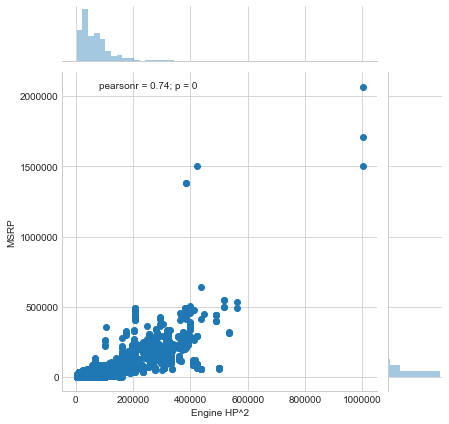

In [116]:
# Create a jointplot showing MSRP versus Engine HP.
sns.jointplot(x='Engine HP^2',y='MSRP',data=df)

Text(0.5,0,'Engine HP^2')

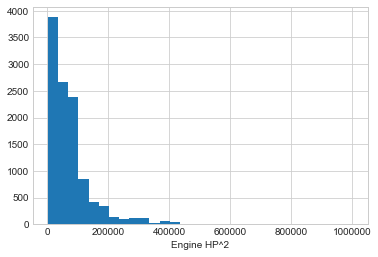

In [117]:
sns.set_style('whitegrid')
df['Engine HP^2'].hist(bins=30)
plt.xlabel('Engine HP^2')

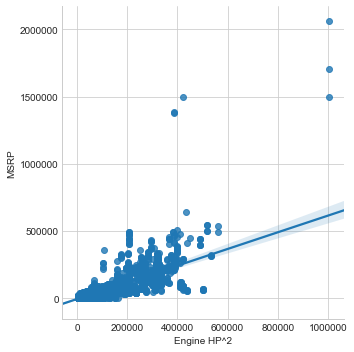

In [118]:
sns.lmplot(x='Engine HP^2', y='MSRP', data=df)
plt.show()

<a id='ab-outliers'></a>

# Identifying outliers

In [120]:
# outliers are cars such as the Bugatti which have 16 cylinders and 0ver a thousand HP
# which will have higher MSRP
df[df['Engine HP'] >= 1000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Engine HP^2
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,2065902,1002001
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1500000,1002001
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1705769,1002001


In [121]:
df[df['MSRP'] >= 150000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Engine HP^2
294,Ferrari,360,2002,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,15,10,2774,160829,160000
296,Ferrari,360,2002,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,15,10,2774,150694,160000
297,Ferrari,360,2002,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,15,10,2774,170829,160000
298,Ferrari,360,2003,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,15,10,2774,165986,160000
299,Ferrari,360,2003,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,15,10,2774,154090,160000
301,Ferrari,360,2003,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,15,10,2774,176287,160000
302,Ferrari,360,2004,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,15,10,2774,157767,160000
303,Ferrari,360,2004,premium unleaded (required),425.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,15,10,2774,187124,180625
305,Ferrari,360,2004,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,15,10,2774,169900,160000
306,Ferrari,360,2004,premium unleaded (required),400.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,15,10,2774,180408,160000


# Save data

In [124]:
# Save undummy data
df1 = df.to_csv('carnotdummied.csv')

<a id='ab-dummies'></a>

# Dummies for categorical columns

In [126]:
df = pd.get_dummies(df, columns=['Make','Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
                            'Vehicle Size', 'Vehicle Style'])
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine HP^2,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ferrari,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,...,Model_Zephyr,Model_allroad,Model_allroad quattro,Model_e-Golf,Model_i-MiEV,Model_i3,Model_iA,Model_iM,Model_iQ,Model_tC,Model_xA,Model_xB,Model_xD,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_flex-fuel (unleaded/natural gas),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr Hatchback,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,112225,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,90000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,90000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,52900,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,52900,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [127]:
df.to_csv('cardummied.csv')

<a id='ab-train/test'></a>

# Train test spit

In [128]:
# Create separate object for target variable
y = df.MSRP

# Create separate object for input features
X = df.drop('MSRP', axis=1)

In [129]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # set aside 20% of observations for the test set.
                                                    random_state=1234)

In [130]:
# verify test and train set shape 
X_test.shape,y_train.shape

((2240, 1013), (8959,))

In [131]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

8959 2240 8959 2240


In [132]:
X_cols = df.drop('MSRP', axis=1).columns

In [133]:
# MSE - the average absolute difference between predicted and actual values for our target variable.
# R2 - The percentt of the variation in the target variable that can be explained by the model

<a id='ab-rf'></a>


# Pipeline with Random Forest Model

In [134]:
#initialize randomforest and selectKbest
selector = SelectKBest(f_regression)  # select k best
clf = RandomForestRegressor() # Model I want to use 

#place SelectKbest transformer and RandomForest estimator into Pipeine
pipe = Pipeline(steps=[
#     ('poly', PolynomialFeatures()), # Did not need because I created dummies for categorial columns which made to many columns 
    ('selector', selector),  # feature selection
    ('clf', clf) # Model
])

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
parameters = {
    'selector__k':[50,100], # params to search through
#     'poly__degree': [2],
    'clf__n_estimators':[20, 100,150], # Start, stop, number of trees
    'clf__min_samples_split': [5], # max number of samples required to split an internal node:
    'clf__max_features': ['auto'], # max number of features considered for splitting a node
    'clf__max_depth': [ 3, 5, 7] # max number of splits per tree
} 


#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
g_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=1, verbose=2)

#Fit the grid search object to the training data and find the optimal parameters using fit()
g_fit = g_search.fit(X_train, y_train)

#Get the best estimator and print out the estimator model
best_clf = g_fit.best_estimator_
print (best_clf)

#Use best estimator to make predictions on the test set
best_predictions = best_clf.predict(X_test)


#metrics
#print(mean_absolute_error(y_true = y_test, y_pred = best_predictions))
#print(r2_score(y_true = y_test, y_pred = best_predictions))


print("MAE: " + str(mean_absolute_error(y_true = y_test, y_pred = best_predictions)))
print("R2 Score: " + str(r2_score(y_true = y_test, y_pred = best_predictions)))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   0.7s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   0.6s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   0.6s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   0.8s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   0.7s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   0.8s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   0.8s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   0.9s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   0.8s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   1.1s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   1.1s
[CV] clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=3, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   1.1s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   0.9s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   1.1s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   1.0s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   1.1s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   1.2s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   1.1s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   1.2s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   1.5s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   1.4s
[CV] clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=5, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   1.5s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=20, selector__k=100, total=   0.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   1.1s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   1.2s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=50, total=   1.1s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   1.6s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   1.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=100, selector__k=100, total=   1.3s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   1.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   1.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=50, total=   1.4s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   2.2s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   2.1s
[CV] clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__max_depth=7, clf__max_features=auto, clf__min_samples_split=5, clf__n_estimators=150, selector__k=100, total=   2.1s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   49.7s finished
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=100, score_func=<function f_regression at 0x109eeb950>)), ('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])
MAE: 6898.5361470355265
R2 Score: 0.9249219699040897


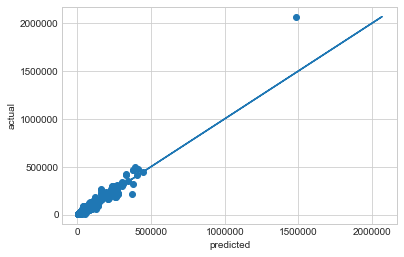

In [135]:
rf_pred = g_search.predict(X_test)
plt.scatter(rf_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

<a id='ab-gb'></a>

# Pipeline with Gradient Boost

In [137]:
#initialize gradient boosting and selectKbest
selector = SelectKBest(f_regression)  # select k best
clf = GradientBoostingRegressor() # Model I want to use 

#place SelectKbest transformer and RandomForest estimator into Pipeine
pipe = Pipeline(steps=[
    ('Scale',StandardScaler()),
    #('poly', PolynomialFeatures()),
    ('selector', selector), 
    ('clf', clf)
])

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
parameters = {
    'selector__k':[50,100], # params to search through
    #'poly__degree': [2], 
    'clf__n_estimators': [20, 100], # num of boosting stages to perform. larger number usually better performance
    'clf__learning_rate':[0.05, 0.1, 0.2], # shrinks the contibution of each tree. trade off between n_estimators and learning rate
    'clf__max_depth': [1, 3, 5] # max depth of the individual regression estimators
}

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
g_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=1, verbose=2)

#Fit the grid search object to the training data and find the optimal parameters using fit()
g_fit = g_search.fit(X_train, y_train)

#Get the best estimator and print out the estimator model
best_clf = g_fit.best_estimator_
print (best_clf)

#Use best estimator to make predictions on the test set
best_predictions = best_clf.predict(X_test)


#metrics
#print(mean_absolute_error(y_true = y_test, y_pred = best_predictions))
#print(r2_score(y_true = y_test, y_pred = best_predictions))

print("MAE: " + str(mean_absolute_error(y_true = y_test, y_pred = best_predictions)))
print("R2 Score: " + str(r2_score(y_true = y_test, y_pred = best_predictions)))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.6s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.6s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.9s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.9s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.6s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.2s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.7s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.6s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.9s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.4s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.4s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.5s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.5s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.7s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.3s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.6s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.8s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.4s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.3s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.5s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.5s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.1s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.2s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=50, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=100, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=50, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.6s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=100, total=   0.6s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=50, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=100, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.2s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.4s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=100, total=   1.2s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.6s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.6s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=50, total=   0.8s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   1.0s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.7s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=100, total=   0.9s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.7s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.4s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=50, total=   1.4s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.2s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.1s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=100 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=100, total=   2.4s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.7min finished
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=50, score_func=<function f_regression at 0x109eeb950>)), ('clf', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=5, ma...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))])
MAE: 4569.530409739521
R2 Score: 0.9531386762746651


In [138]:
len(best_clf.steps[1][1].get_support())

1013

In [139]:
feature = list(X_cols[best_clf.steps[1][1].get_support()])

In [140]:
X_cols = df.drop('MSRP', axis=1).columns

In [141]:
feature_import = best_clf.steps[2][1].feature_importances_

In [142]:
dict(zip(feature,feature_import))

{'Driven_Wheels_all wheel drive': 0.010180044520391722,
 'Driven_Wheels_front wheel drive': 0.0030040474201914486,
 'Driven_Wheels_rear wheel drive': 0.006939920130830467,
 'Engine Cylinders': 0.056492723143649226,
 'Engine Fuel Type_flex-fuel (premium unleaded required/E85)': 0.004622118920666116,
 'Engine Fuel Type_premium unleaded (required)': 0.02054458099422069,
 'Engine Fuel Type_regular unleaded': 0.009821706110858336,
 'Engine HP': 0.16784824407025872,
 'Engine HP^2': 0.19046619308817184,
 'Make_Aston Martin': 0.005356143350255724,
 'Make_Bentley': 0.012146657996343466,
 'Make_Bugatti': 0.0007619216530423492,
 'Make_Ferrari': 0.008570128324786444,
 'Make_Lamborghini': 0.004904571887663365,
 'Make_Maybach': 0.004338514012278021,
 'Make_Porsche': 0.008641787530394593,
 'Make_Rolls-Royce': 0.014741114807662128,
 'Model_458 Italia': 0.005405439308733585,
 'Model_57': 0.0018458020543991557,
 'Model_62': 0.005726411807380986,
 'Model_911': 0.0028952290716332068,
 'Model_Arnage': 0.00

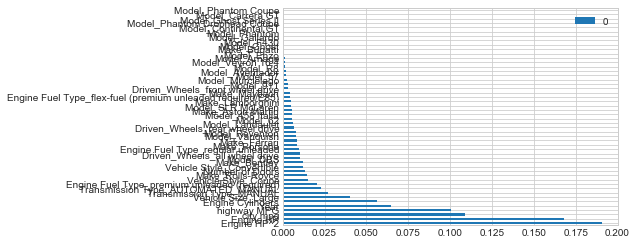

In [143]:
pd.DataFrame(feature_import, 
             index=feature).sort_values(0, 
                          ascending = False).plot.barh()

In [147]:
pd.DataFrame(feature_import, 
             index=feature).sort_values(0, 
                          ascending = False)

,0
Engine HP^2,0.190466
Engine HP,0.167848
city mpg,0.108774
highway MPG,0.100327
Year,0.064491
Engine Cylinders,0.056493
Vehicle Size_Large,0.040272
Transmission Type_MANUAL,0.026774
Transmission Type_AUTOMATED_MANUAL,0.023061
Engine Fuel Type_premium unleaded (required),0.020545


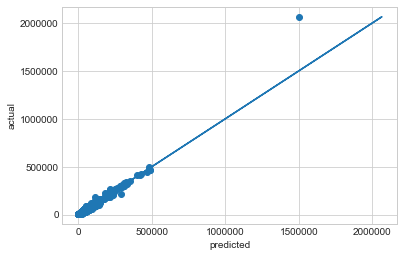

In [144]:
gb_pred = g_search.predict(X_test)
plt.scatter(gb_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

<a id='ab-kn'></a>

# Pipeline with Kneighbors

In [145]:
#initialize k-neighbors and selectKbest
selector = SelectKBest(f_regression)  # select k best
clf = KNeighborsRegressor()

#place SelectKbest transformer and RandomForest estimator into Pipeine
pipe = Pipeline(steps=[
    ('Scale',StandardScaler()),
   # ('poly', PolynomialFeatures()),
    ('selector', selector), 
    ('clf', clf)
])

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
parameters = {
    'selector__k':[50], # params to search through
    #'poly__degree': [2], 
    'clf__n_neighbors':[3,5,7], # number of neighbors to use 
    'clf__weights': ['uniform'], # weight function used in prediction 
    'clf__algorithm':['auto']}  # Algorithm used to compute the nearest neighbors 

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
g_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=1, verbose=2)

#Fit the grid search object to the training data and find the optimal parameters using fit()
g_fit = g_search.fit(X_train, y_train)

#Get the best estimator and print out the estimator model
best_clf = g_fit.best_estimator_
print (best_clf)

#Use best estimator to make predictions on the test set
best_predictions = best_clf.predict(X_test)

#metrics
#print(mean_absolute_error(y_true = y_test, y_pred = best_predictions))
#print(r2_score(y_true = y_test, y_pred = best_predictions))

print("MAE: " + str(mean_absolute_error(y_true = y_test, y_pred = best_predictions)))
print("R2 Score: " + str(r2_score(y_true = y_test, y_pred = best_predictions)))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] clf__algorithm=auto, clf__n_neighbors=3, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=3, clf__weights=uniform, selector__k=50, total=   1.5s
[CV] clf__algorithm=auto, clf__n_neighbors=3, clf__weights=uniform, selector__k=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=3, clf__weights=uniform, selector__k=50, total=   1.5s
[CV] clf__algorithm=auto, clf__n_neighbors=3, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=3, clf__weights=uniform, selector__k=50, total=   1.6s
[CV] clf__algorithm=auto, clf__n_neighbors=5, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=5, clf__weights=uniform, selector__k=50, total=   1.8s
[CV] clf__algorithm=auto, clf__n_neighbors=5, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=5, clf__weights=uniform, selector__k=50, total=   1.9s
[CV] clf__algorithm=auto, clf__n_neighbors=5, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=5, clf__weights=uniform, selector__k=50, total=   1.7s
[CV] clf__algorithm=auto, clf__n_neighbors=7, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=7, clf__weights=uniform, selector__k=50, total=   1.7s
[CV] clf__algorithm=auto, clf__n_neighbors=7, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=7, clf__weights=uniform, selector__k=50, total=   1.8s
[CV] clf__algorithm=auto, clf__n_neighbors=7, clf__weights=uniform, selector__k=50 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__algorithm=auto, clf__n_neighbors=7, clf__weights=uniform, selector__k=50, total=   1.6s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   38.2s finished
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=50, score_func=<function f_regression at 0x109eeb950>)), ('clf', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'))])
MAE: 4840.068601190476
R2 Score: 0.8896617420551712


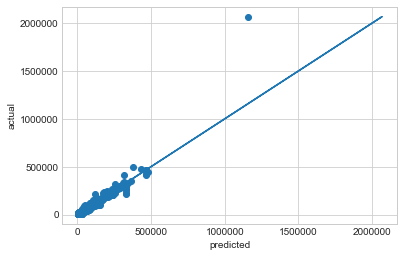

In [146]:
kn_pred = g_search.predict(X_test)
plt.scatter(kn_pred, y_test)
plt.plot(y_test, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

<a id='ab-visualizepred'></a>

# Visualize predictions 

In [148]:
# plot y-pred vs y
# plot residulas vs y
# Residual histogram  (see if it looks normal)
# Y-hat vs y + y vs y
# Hyperparameter tuning curves
# Metrics vs model

In [149]:
def lin_reg(x,y):
    # SLR, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    # The optimal beta is found by: mean(y) - b1 * mean(x).
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    return beta_0, beta_1

In [150]:
x = df['Engine Cylinders'].values
y = df['MSRP'].values
beta0, beta1 = lin_reg(x,y)

#Print the optimal values.
print('The Optimal Y Intercept is ', beta0)
print('The Optimal slope is ', beta1)

The Optimal Y Intercept is  -60081.168704419215
The Optimal slope is  18051.885440336122


In [151]:
y_pred = beta0 + beta1*x

In [152]:
# Appending the predicted values:
df['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred:
df['Residuals'] = abs(df['MSRP']-df['Pred'])

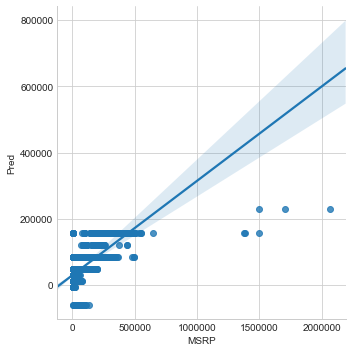

In [153]:
# how our predictions compare to the true values.
sns.lmplot(x='MSRP', y='Pred', data=df)

In [154]:
x = df['Engine HP'].values
y = df['MSRP'].values
beta0, beta1 = lin_reg(x,y)

#Print the optimal values.
print('The Optimal Y Intercept is ', beta0)
print('The Optimal slope is ', beta1)

The Optimal Y Intercept is  -51242.12399479592
The Optimal slope is  367.99756098271956


In [155]:
# Appending the predicted values
df['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred:
df['Residuals'] = abs(df['MSRP']-df['Pred'])

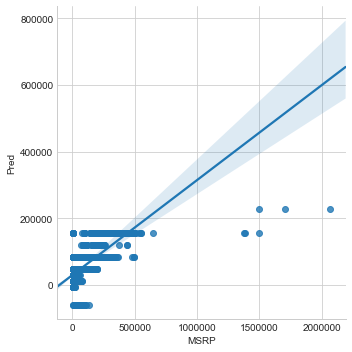

In [156]:
sns.lmplot(x='MSRP', y='Pred', data=df)

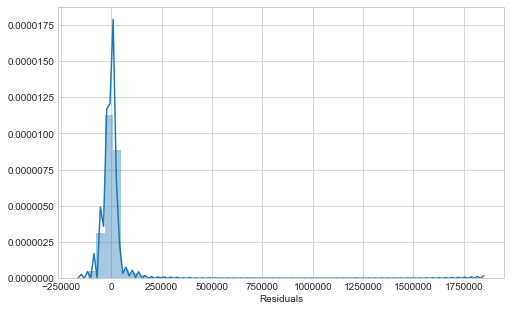

In [157]:
# Assumptions for my model
plt.figure(figsize=(8,5))
df['Residuals'] = df['MSRP'] - df['Pred']
sns.distplot(df['Residuals'])

<a id='ab-bestmodel'></a>

# Best Model for less features

In [158]:
#initialize gradient boosting and selectKbest
selector = SelectKBest(f_regression)  # select k best
clf = GradientBoostingRegressor() # Model I want to use 

#place SelectKbest transformer and RandomForest estimator into Pipeine
pipe = Pipeline(steps=[
    ('Scale',StandardScaler()),
    ('selector', selector), 
    ('clf', clf)
])

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
parameters = {
    'selector__k':[12], # params to search through
    'clf__n_estimators': [20, 100], # num of boosting stages to perform. larger number usually better performance
    'clf__learning_rate':[0.05, 0.1, 0.2], # shrinks the contibution of each tree. trade off between n_estimators and learning rate
    'clf__max_depth': [1, 3, 5] # max depth of the individual regression estimators
}

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
g_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=1, verbose=2)

#Fit the grid search object to the training data and find the optimal parameters using fit()
g_fit = g_search.fit(X_train, y_train)

#Get the best estimator and print out the estimator model
best_clf = g_fit.best_estimator_
print (best_clf)

#Use best estimator to make predictions on the test set
best_predictions = best_clf.predict(X_test)


#metrics
#print(mean_absolute_error(y_true = y_test, y_pred = best_predictions))
#print(r2_score(y_true = y_test, y_pred = best_predictions))

print("MAE: " + str(mean_absolute_error(y_true = y_test, y_pred = best_predictions)))
print("R2 Score: " + str(r2_score(y_true = y_test, y_pred = best_predictions)))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.6s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.7s
[CV] clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.05, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.7s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.6s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.6s
[CV] clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.6s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=1, clf__n_estimators=100, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.5s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=3, clf__n_estimators=100, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.4s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=20, selector__k=12, total=   0.3s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.9s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.8s
[CV] clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=12 


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  clf__learning_rate=0.2, clf__max_depth=5, clf__n_estimators=100, selector__k=12, total=   0.7s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   28.0s finished
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=12, score_func=<function f_regression at 0x109eeb950>)), ('clf', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=5, ma...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))])
MAE: 7224.197106401388
R2 Score: 0.944446769451272


In [160]:
best_clf.steps[1][1].get_support()

array([False,  True,  True, ..., False, False, False])

In [161]:
feature = list(X_cols[best_clf.steps[1][1].get_support()])

In [162]:
feature_import = best_clf.steps[2][1].feature_importances_

In [163]:
dict(zip(feature,feature_import))

{'Engine Cylinders': 0.161652154815887,
 'Engine Fuel Type_premium unleaded (required)': 0.03686347996660804,
 'Engine Fuel Type_regular unleaded': 0.022067087420454934,
 'Engine HP': 0.3288154443057195,
 'Engine HP^2': 0.39578180065792545,
 'Make_Bentley': 0.011090018954312117,
 'Make_Bugatti': 0.0011565166088123209,
 'Make_Lamborghini': 0.016016273040587527,
 'Make_Maybach': 0.007658665277021095,
 'Make_Rolls-Royce': 0.009172297191849426,
 'Model_Landaulet': 0.008039050208676577,
 'Model_Veyron 16.4': 0.0016872115521459321}

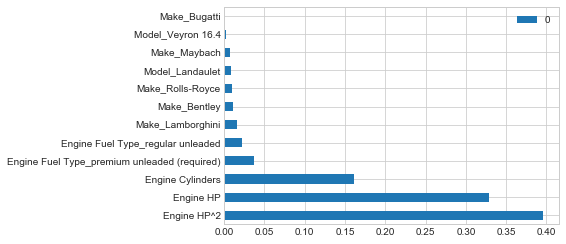

In [164]:
pd.DataFrame(feature_import, 
             index=feature).sort_values(0, 
                          ascending = False).plot.barh()

In [165]:
pd.DataFrame(feature_import, 
             index=feature).sort_values(0, 
                          ascending = False)

,0
Engine HP^2,0.395782
Engine HP,0.328815
Engine Cylinders,0.161652
Engine Fuel Type_premium unleaded (required),0.036863
Engine Fuel Type_regular unleaded,0.022067
Make_Lamborghini,0.016016
Make_Bentley,0.011090
Make_Rolls-Royce,0.009172
Model_Landaulet,0.008039
Make_Maybach,0.007659


In [166]:
import statsmodels.api as sm

In [167]:
model = sm.OLS(y,X).fit()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     847.9
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:34:14   Log-Likelihood:            -1.1478e+05
No. Observations:               11199   AIC:                         2.315e+05
Df Residuals:                   10233   BIC:                         2.386e+05
Df Model:                         965                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Year                                                            744.0213     81.465      9.133      0.000     584.334     903.709
Engine HP                                                      -127.7246      8.198    -15.579      0.000    -143.795    -111.654
Engine Cylinders                                               1195.3531    183.652      6.509      0.000     835.359    1555.347
Number of Doors                                                 943.7598    508.433      1.856      0.063     -52.869    1940.389
highway MPG                                                      -5.4721     22.103     -0.248      0.804     -48.798      37.854
city mpg                                                        -61.3339     63.666     -0.963      0.335    -186.131      63.463
Popularity                                                      -39.2920      2.871    -13.686      0.000     -44.920     -33.664
Engine HP^2                                                       0.3414      0.010     34.979      0.000       0.322       0.361
Make_Acura                                                    -1.135e+05   5682.850    -19.980      0.000   -1.25e+05   -1.02e+05
Make_Alfa Romeo                                               -5.201e+04   3788.710    -13.727      0.000   -5.94e+04   -4.46e+04
Make_Aston Martin                                              1.192e+04   5828.697      2.045      0.041     492.905    2.33e+04
Make_Audi                                                     -1.102e+04   4096.029     -2.691      0.007   -1.91e+04   -2994.038
Make_BMW                                                       3.836e+04   5130.895      7.476      0.000    2.83e+04    4.84e+04
Make_Bentley                                                   1.088e+05   5137.073     21.184      0.000    9.88e+04    1.19e+05
Make_Bugatti                                                   6.922e+05   3637.595    190.291      0.000    6.85e+05    6.99e+05
Make_Buick                                                    -1.244e+05   5587.367    -22.272      0.000   -1.35e+05   -1.13e+05
Make_Cadillac                                                 -5.911e+04   2011.354    -29.391      0.000   -6.31e+04   -5.52e+04
Make_Chevrolet                                                -7.326e+04   3239.041    -22.618      0.000   -7.96e+04   -6.69e+04
Make_Chrysler                                                 -8.716e+04   5579.228    -15.622      0.000   -9.81e+04   -7.62e+04
Make_Dodge                                                    -6.135e+04   4591.941    -13.360      0.000   -7.03e+04   -5.23e+04
Make_FIAT                                                      -9.24e+04   4262.418    -21.67

# Plotting true msrp vs the predicted msrp to evalate 

In [169]:
X = df[['Driven_Wheels_all wheel drive','Driven_Wheels_front wheel drive',
        'Driven_Wheels_rear wheel drive','Engine Cylinders']].values
y = df['MSRP'].values

model =RandomForestRegressor()
model.fit(X, y)

y_pred = model.predict(X)

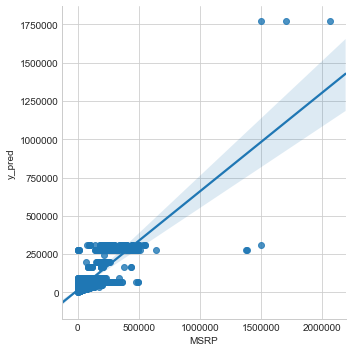

In [170]:
df['y_pred'] = y_pred
sns.lmplot(x='MSRP', y='y_pred', data=df)

# Future interests
Other info

In [ ]:
#Get examples from ebay and see if I can predict price or correct price. 
# Against my price? 
# Create another model for outliers 
# Classification for normal cars vs outliers(determine higher prices)